In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_variant=pd.read_csv("training_variants.csv")
df_variant.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [3]:
df_train=pd.read_csv('training_text.csv',sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [4]:
df= pd.merge(df_train, df_variant, how='left', on='ID')

In [5]:
df.head()
df.shape

(3321, 5)

In [6]:
df=df[df["TEXT"].notnull()]
df.head()

,ID,TEXT,Gene,Variation,Class
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2
3,3,Recent evidence has demonstrated that acquired...,CBL,N454D,3
4,4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 5 columns):
ID           3316 non-null int64
TEXT         3316 non-null object
Gene         3316 non-null object
Variation    3316 non-null object
Class        3316 non-null int64
dtypes: int64(2), object(3)
memory usage: 155.4+ KB


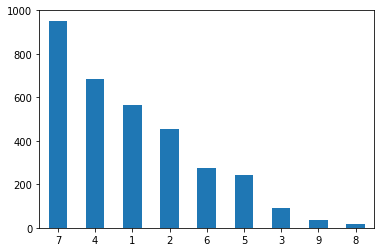

In [8]:
df['Class'].value_counts().plot(kind="bar", rot=0)

In [9]:
df['Class'].value_counts()

7    952
4    686
1    566
2    452
6    273
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [10]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', \
            's', 't'])

In [18]:
from bs4 import BeautifulSoup
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [50]:
from tqdm import tqdm
updated_text= []
# tqdm is for printing the status bar
for sentance in tqdm(df['TEXT'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    updated_text.append(sentance.strip())
    



  0%|                                                                                         | 0/3316 [00:00<?, ?it/s]

  0%|                                                                                 | 5/3316 [00:00<01:21, 40.75it/s]

  0%|▏                                                                                | 8/3316 [00:00<01:38, 33.51it/s]

  0%|▎                                                                               | 12/3316 [00:00<01:41, 32.43it/s]

  0%|▎                                                                               | 15/3316 [00:00<01:51, 29.63it/s]

  1%|▍                                                                               | 20/3316 [00:00<01:39, 33.03it/s]

  1%|▌                                                                               | 25/3316 [00:00<01:30, 36.24it/s]

  1%|▊                                                                               | 32/3316 [00:00<01:24, 38.74it/s]

  1%|▊                        

 16%|█████████████                                                                  | 547/3316 [00:18<01:32, 29.91it/s]

 17%|█████████████▏                                                                 | 551/3316 [00:18<01:31, 30.33it/s]

 17%|█████████████▏                                                                 | 555/3316 [00:18<01:29, 30.74it/s]

 17%|█████████████▎                                                                 | 559/3316 [00:19<01:25, 32.31it/s]

 17%|█████████████▍                                                                 | 563/3316 [00:19<01:34, 29.02it/s]

 17%|█████████████▌                                                                 | 567/3316 [00:19<01:28, 30.99it/s]

 17%|█████████████▌                                                                 | 571/3316 [00:19<01:30, 30.17it/s]

 17%|█████████████▋                                                                 | 575/3316 [00:19<01:26, 31.81it/s]

 17%|█████████████▊             

 34%|██████████████████████████▎                                                   | 1120/3316 [00:37<01:37, 22.46it/s]

 34%|██████████████████████████▍                                                   | 1123/3316 [00:37<01:35, 23.08it/s]

 34%|██████████████████████████▍                                                   | 1126/3316 [00:37<01:33, 23.37it/s]

 34%|██████████████████████████▌                                                   | 1129/3316 [00:37<01:47, 20.32it/s]

 34%|██████████████████████████▋                                                   | 1132/3316 [00:37<02:04, 17.61it/s]

 34%|██████████████████████████▋                                                   | 1134/3316 [00:37<02:05, 17.38it/s]

 34%|██████████████████████████▋                                                   | 1137/3316 [00:37<02:09, 16.77it/s]

 34%|██████████████████████████▊                                                   | 1140/3316 [00:38<01:55, 18.86it/s]

 34%|██████████████████████████▉

 53%|█████████████████████████████████████████▍                                    | 1763/3316 [00:55<00:32, 47.17it/s]

 53%|█████████████████████████████████████████▌                                    | 1769/3316 [00:55<00:36, 42.89it/s]

 54%|█████████████████████████████████████████▊                                    | 1777/3316 [00:56<00:31, 49.29it/s]

 54%|█████████████████████████████████████████▉                                    | 1783/3316 [00:56<00:34, 44.04it/s]

 54%|██████████████████████████████████████████                                    | 1790/3316 [00:56<00:30, 49.52it/s]

 54%|██████████████████████████████████████████▏                                   | 1796/3316 [00:56<00:32, 46.75it/s]

 54%|██████████████████████████████████████████▍                                   | 1802/3316 [00:56<00:37, 40.86it/s]

 55%|██████████████████████████████████████████▌                                   | 1808/3316 [00:56<00:34, 44.22it/s]

 55%|███████████████████████████

 78%|█████████████████████████████████████████████████████████████                 | 2597/3316 [01:14<00:16, 43.23it/s]

 78%|█████████████████████████████████████████████████████████████▏                | 2602/3316 [01:14<00:16, 43.22it/s]

 79%|█████████████████████████████████████████████████████████████▎                | 2608/3316 [01:14<00:15, 47.10it/s]

 79%|█████████████████████████████████████████████████████████████▍                | 2614/3316 [01:14<00:14, 48.21it/s]

 79%|█████████████████████████████████████████████████████████████▌                | 2619/3316 [01:15<00:15, 44.24it/s]

 79%|█████████████████████████████████████████████████████████████▋                | 2624/3316 [01:15<00:16, 42.67it/s]

 79%|█████████████████████████████████████████████████████████████▊                | 2629/3316 [01:15<00:16, 41.59it/s]

 79%|█████████████████████████████████████████████████████████████▉                | 2635/3316 [01:15<00:14, 45.54it/s]

 80%|███████████████████████████

In [23]:
updated_text[1]

'abstract background non small cell lung cancer nsclc heterogeneous group disorders number genetic proteomic alterations c cbl ubiquitin ligase adaptor molecule important normal homeostasis cancer determined genetic variations c cbl relationship receptor tyrosine kinases egfr met functionality nsclc methods findings using archival formalin fixed paraffin embedded ffpe extracted genomic dna show c cbl mutations occur somatic fashion lung cancers c cbl mutations not mutually exclusive met egfr mutations however independent kras mutations normal tumor pairwise analysis significant loss heterozygosity loh c cbl locus none samples revealed mutation remaining copy c cbl c cbl loh also positively correlated egfr met mutations observed samples using select c cbl somatic mutations obtained caucasian taiwanese african american samples respectively transfected nsclc cell lines increased cell viability cell motility conclusions taking overall mutation rate c cbl combination somatic missense mutati

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(updated_text)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(updated_text)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['aa', 'aa aa', 'aa able', 'aa activity', 'aa addition', 'aa adopt', 'aa alone', 'aa amino', 'aa atttatctgctctt', 'aa bottom']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (3316, 302912)
the number of unique words including both unigrams and bigrams  302912


In [52]:
X=final_tf_idf 
y=df['Class']


accuracy= 32.22891566265061


In [63]:
from sklearn.naive_bayes import MultinomialNB
# instantiate learning model alpha = optimal_alpha
nb_optimal =  MultinomialNB(alpha = 0.000000001)

# fitting the model
nb_optimal.fit(X,y)
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = nb_optimal.predict(X)

In [64]:
train_acc_bow = nb_optimal.score(X, y)
print("Train accuracy", train_acc_bow)

Train accuracy 0.8006634499396864


In [65]:
from sklearn.metrics import accuracy_score
acc_bow = accuracy_score(y, pred) * 100
print('accuracy=',acc_bow)

accuracy= 80.06634499396864


In [ ]:
input_text=input()

# for cleaning text
updated_text1= []
sentance = re.sub(r"http\S+", "", sentance)
sentance = BeautifulSoup(sentance, 'lxml').get_text()
sentance = decontracted(sentance)
sentance = re.sub("\S*\d\S*", "", sentance).strip()
sentance = re.sub('[^A-Za-z]+', ' ', sentance)
sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
updated_text1.append(sentance.strip())

#for tfidf

final_tf_idf1 = tf_idf_vect.transform(updated_text1)



In [67]:
pred = nb_optimal.predict(final_tf_idf1)
print(pred)


[4]


(3316, 5)